# Задача математической статистики. Точечные оценки.

Уже знакомо: вероятностное пространство, измеримая функция, случайная величина, вероятностная мера, распределение.

## Задача статистики

Вспомним задачу теории вероятностей. Обратим её.

Почему статистика не является точной наукой?

## Определение
Дано $(\Omega, \mathcal{F}, \mathbb P)$. \
Пусть, дан набор случайных величин $x_1, x_2, \dots, x_n$. Реализацией набора называется набор значений случайных величин на некотором событии $\omega \in \Omega$: 

$x_1(\omega), x_2(\omega), \dots, x_n(\omega)$.

Пример: набор случайных величин - $n$ бросков монеты. Реализация - конкретный набор (решка, решка, орёл, ..., решка).

## Определение
Выборка - набор независмимых, одинаково распределённых случайных величин $X_1, X_2, \dots, X_n$. 

$\textbf X^n$.

В терминах определений выше: задача статистики - выяснить свойства распределения $X_i$ по реализации выборки $\textbf{X}^n$.

## Оценки

### Определение
Статистическая модель -- измеримое пространство значений выборки, семейство распределений: $(X, \mathcal B_X, \mathbb P)$.

ещё чуть-чуть...

### Определение
Пусть в статистической модели семейство распределений параметрическое: $\{\mathbb P_{\theta}, \theta \in \Theta\}$. Тогда оценкой параметра $\theta$ называется измеримая функция $S: X \to \Theta$.

### Примеры оценок.

1. Глупый пример. Пусть монетка выпадает значениями 0 или 1 - это пространство значений. Модель: $P(0) = p, P(1) = 1 - p$. (Почему это параметрическое семейство распределений?). Пусть изветсна реализация выборки $X^n$. Оценка: 


$\hat{p}(\textbf X^n) = 1$

2. Синтетический пример. Пусть дана выборка $\textbf X^n$ из экспоненциального распределения с параметром $\theta$. Оценка: $\hat{\theta}(\textbf X^n) = tan(sin(e^{-X_1^2}))$.

3. Очень важный пример - выборочное среднее. Пусть дана выборка из нормального распределения с дисперсией 1 и матожиданием $\mu$. Оценка: $\hat{\mu} = \frac{1}{n}\sum_{i=1}^nX_i$.

4. Не менее важный - выборочная дисперсия - оценка дисперсии распределения.
    
$s^2 = \frac{1}{n - 1}\sum_{i=1}^n(X_i - \overline{X^n})^2 = \frac{n}{n - 1}\overline{(X_i - \overline{X^n})^2}$ 

### Свойства оценок*

Уже знакомо: мат. ожидание, сходимость по вероятности, сходимость по распределению

#### Определение
Оценка $\hat{\theta}$ называется несмещённой, если $\mathbb E \hat{\theta}(\textbf X^n) = \theta$

Упражнение. Является ли несмещённой оценка из примера 3? Из примера 4?

#### Определение
Оценка называется состоятельной, если $\hat{\theta}(\textbf X^n) \to \theta$ по вероятности при $n \to \infty$.

Упражнение. Почему состоятельна оценка из примера 3?

##### Проверка Состоятельности оценки


Проверка закона больших чисел

In [ ]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
mu = 3
N = 1000

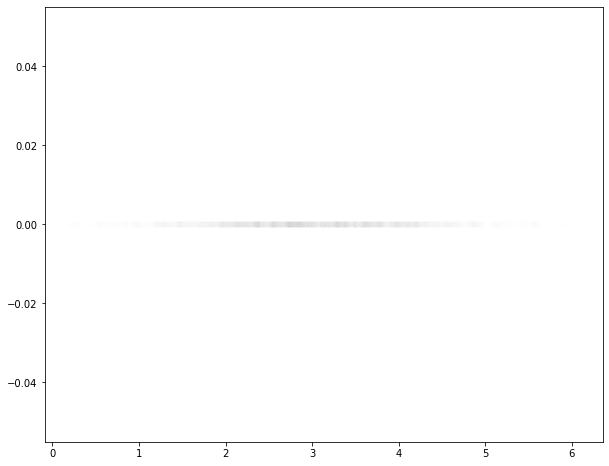

In [ ]:
sample = sts.norm(loc=mu).rvs(N)
plt.figure(figsize=(10,8))
plt.scatter(sample, [0] * len(sample), alpha=0.005)

In [ ]:
sample = sts.norm(loc=mu).rvs(N)
abs(np.mean(sample) - mu)


0.05380386375596702

In [ ]:
# вероятность того, что этот модуль больше eps
eps = 0.02
n_exp = 100
positive = 0
for i in range(n_exp):
    sample = sts.norm(loc=mu).rvs(N)
    if abs(np.mean(sample) - mu) > eps:
        positive += 1
        
positive / n_exp


0.59

In [ ]:
probability = []
n = np.arange(1, 10000)
for N in n:
    n_exp = 100
    positive = 0
    for i in range(n_exp):
        sample = sts.norm(loc=mu).rvs(N)
        if abs(np.mean(sample) - mu) > eps:
            positive += 1
    
    probability.append(positive/n_exp)
    
plt.figure(figsize=(12,10))
plt.scatter(n, probability)



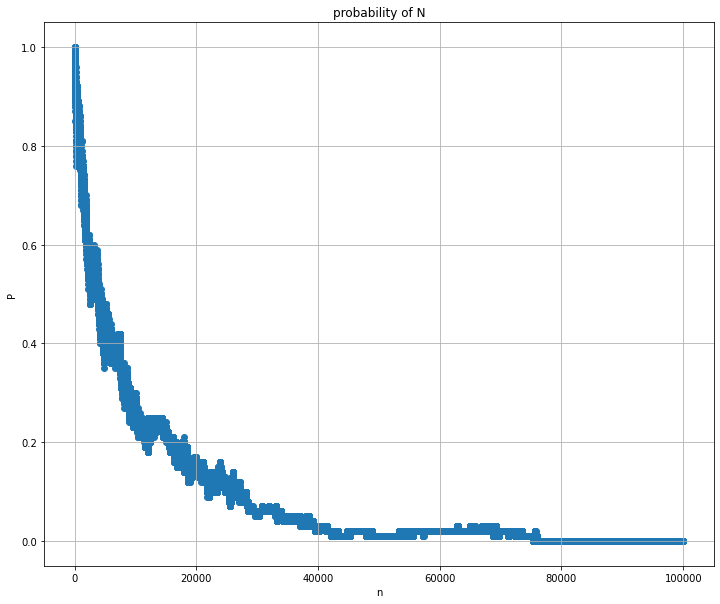

In [ ]:
eps = 0.01
N = 10**5
M = 100
mu = 3

samples = sts.norm(loc=mu).rvs((M, N))

mean = np.cumsum(samples, axis=1) / (np.arange(N) + 1)
diff = np.abs(mean - mu)
positive = diff > eps
probability = np.mean(positive, axis=0)
probability

plt.figure(figsize=(12, 10))
plt.title("probability of N")
plt.ylabel("P")
plt.xlabel("n")
plt.grid()
plt.scatter(np.arange(N) + 1, probability)

In [ ]:
np.arange(N)

array([   0,    1,    2, ..., 9997, 9998, 9999])

Проверка на саму состоятельность 

/var/folders/52/l8gwybc524v1vy0tmfzczfzcm_d1zl/T/ipykernel_9643/145812958.py:8: RuntimeWarning: divide by zero encountered in true_divide
  mean = np.cumsum(sample) / np.arange(N)


(-2.0, 4.0)

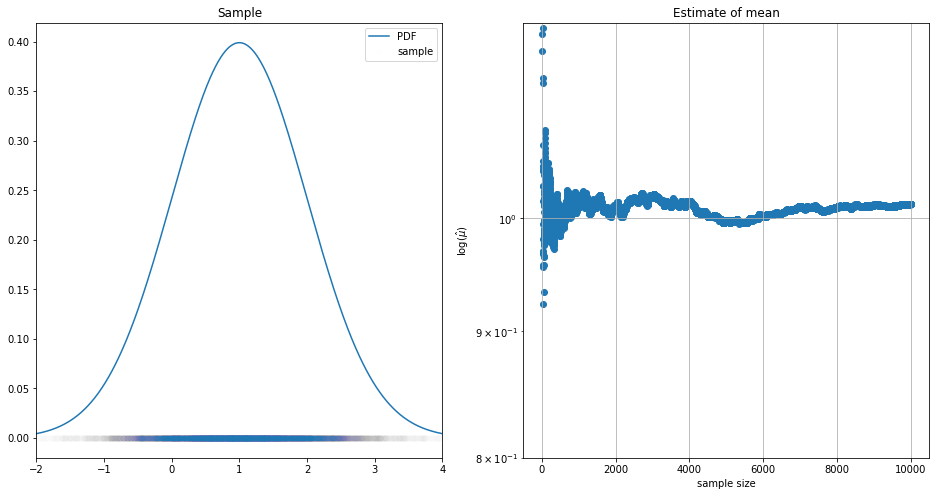

In [ ]:
N = 10000
mu = 1

sample = sts.norm(loc=mu).rvs(N)

# mean = [np.mean(sample[:i]) for i in range(1, N)]

mean = np.cumsum(sample) / np.arange(N)
n = np.arange(N)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax2.set_ylim(0.8, 1.2)
ax2.set_ylabel(r'$\log(\hat{\mu})$')
ax2.set_xlabel('sample size')
ax2.grid()
ax2.set_yscale('log')
ax2.set_title('Estimate of mean')
ax2.scatter(n, mean)

x = np.linspace(-5, 5, 1000)
ax1.set_title('Sample')
ax1.scatter(sample, [0] * len(sample), alpha=0.005, label='sample')
ax1.plot(x, sts.norm(loc=mu).pdf(x), label='PDF')
ax1.legend()
ax1.set_xlim((-2, 4))

#### Определение

Оценка называется асимптотически нормальной, если существует некоторое число $\sigma$ такое, что

$\sqrt{n}\left(\hat{\theta}(\textbf X^n) - \theta\right) \to \mathcal N(0, \sigma)$ по распределению при $n \to \infty$.

Число $\sigma$ назвыается асимптотической дисперсией оценки.

Упражнение. Почему оценка из примера 3 асимптотически нормальна?

/var/folders/52/l8gwybc524v1vy0tmfzczfzcm_d1zl/T/ipykernel_9643/3577962563.py:7: RuntimeWarning: divide by zero encountered in true_divide
  as_norm_stat = np.sqrt(n) * (np.cumsum(sample, axis=1) / n - mu)
/var/folders/52/l8gwybc524v1vy0tmfzczfzcm_d1zl/T/ipykernel_9643/3577962563.py:7: RuntimeWarning: invalid value encountered in multiply
  as_norm_stat = np.sqrt(n) * (np.cumsum(sample, axis=1) / n - mu)


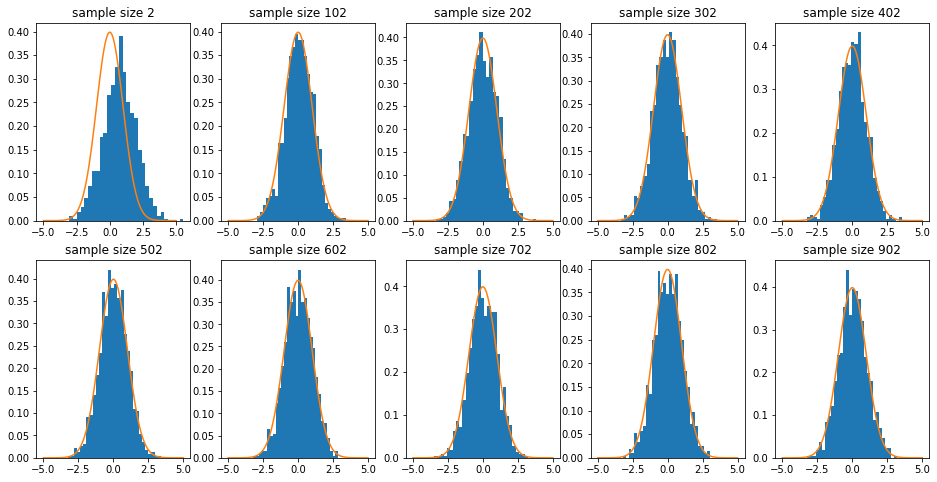

In [ ]:
N = 1000
M = 1000

sample = sts.norm(loc=mu).rvs((M, N))

n = np.vstack([np.arange(N)] * M)
as_norm_stat = np.sqrt(n) * (np.cumsum(sample, axis=1) / n - mu)

sizes = range(2, N, 100)  
fig, axs = plt.subplots(2, 5, figsize=(16, 8))
for size, ax in zip(sizes, axs.flatten()):
    ax.hist(as_norm_stat[:, size], density=True, bins=30)
    
    x = np.linspace(-5, 5, 100)
    ax.plot(x, sts.norm().pdf(x))
    ax.set_title(f'sample size {size}')

Упражнение. Доказать, что любая асимптотически нормальная оценка является состоятельной.

Замечание. Существует состоятельная оценка, не являющаяся аисмптотически нормальной. (Распределение, для которого не выполнена ЦПТ).

### Методы построения оценок

#### Определение

Пусть дана выборка $\textbf X^n$ из распределения $\mathbb P_{\theta}$ и известны такие функции $g_1, g_2, \dots, g_m$ такие, что 

$\mathbb E g_i(\textbf X^n, \theta) = 0, \forall 1 \leq i \leq m$.

Тогда оценка, полученная решением системы уравнений

$\frac{1}{n} \sum_{j = 1}^n g_i(X_j, \hat{\theta}) = 0, \forall 1 \leq i \leq m$

называется оценкой методом моментов.

1. Простой пример. Пусть $\textbf X^n$ - выборка из распределения Бернулли с вероятностью положительного исхода $\theta$. 

Положим $g(X, \theta) = X - \theta$. Так как $\mathbb E X = \theta$, то $\mathbb E g(X, \theta) = \mathbb E (X - \theta) = 0.$

Тогда, оценка методом моментов есть решение уравнения

$\frac{1}{n} \sum_{j = 1}^n (X_i - \hat{\theta}) = 0$.

$\hat{\theta} = \frac{1}{n}\sum_{i=1}^nX_i.$

Далее среднее будем обозначать как $\overline{\textbf X^n}$.

2. Содержательный пример. Пусть $\textbf X^n$ - выборка из нормального распределения с параметрами $\mu, \sigma$. Найти оценку параметров методом моментов.

#### Определение

Пусть $\textbf X^n$ - выборка из распределения $\mathbb P_\theta$ заданного плотностью распределения (в непрерывном случае) или функцией вероятности (в дискретном случае) $f(\textbf X^n|\theta)$. Тогда функцией правдоподобия параметра $\theta$ при фиксированной выборке называется

$L(\theta|\textbf X^n) = f(\textbf X^n|\theta)$.

Замечание. Так как величины выборки независимы, $L(\theta|\textbf X^n) = \prod_{i=1}^n f(X_i|\theta)$.

#### Определение

Значение $\hat{\theta}$, максимизирующее функцию правдоподобия, называется оценкой максимального правдоподобия.

$\hat{\theta} = arg\max_{\Theta} L(\theta|\textbf X^n)$

1. Предыдущий простой пример. Заметим, что функция вероятности $\mathbb P(x) = \theta \mathbb I(x = 1) + (1 - \theta) \mathbb I(x = 0)$ = $\theta^x(1 - \theta)^{1 - x}$.

Функция правдоподобия тогда $L = \theta^{\sum_{i=1}^n X_i}(1 - \theta)^{n - \sum_{i=1}^n X_i}$. Берём производную по $\theta$, приравниваем к нулю, получаем оценку ОМП

$\hat{\theta} = \overline{\textbf X^n}$.

#### Определение (на сегодня последнее, честно)
Пусть дана выборка $\textbf X^n$. Порядковой статистикой номер $i$ называется $i$-й в порядке возрастания элемент отсортированной выборки:

$X_{(i)} \in \{X_1, \dots, X_n\}; X_{(1)} \leq X_{(2)} \leq \dots \leq X_{(n)}$.

Замечание. Порядковые статистики выборки в общем случае не являются независимыми.

### Практическая часть

1. Дана выборка $\textbf X^n \sim U(\theta, 1)$. Найти оценку параметра $\theta$ методом моментов и методом максимального правдоподобия. Предположить их свойства. Графически сравнить поведение оценок при увеличении размера выборки. Сравнить качество оценок на основе выборочной дисперсии оценки на размере выборки 1000. Количество реализаций взять равным 100.

$\hat{\theta}_{MLE} = X_{(1)}$

$\hat{\theta}_{MM} = \overline{2\textbf X^n - 1}$

In [ ]:
thetas = [0.2, 0.4, 0.8]

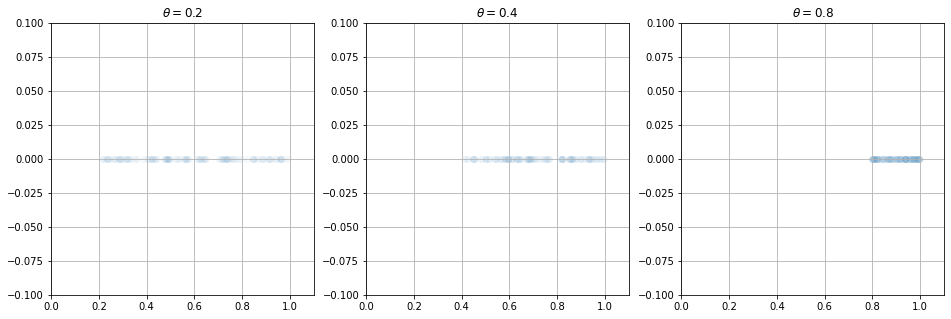

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

for i in range(len(thetas)):
    theta = thetas[i]
    gen = sts.uniform(loc=theta, scale=(1-theta))
    sample = gen.rvs(100)
    axs[i].scatter(sample, [0] * 100, alpha=0.04)
    axs[i].set_xlim((0, 1.1))
    axs[i].set_ylim((-0.1, 0.1))
    axs[i].grid()
    axs[i].set_title(r'$\theta = $' + str(theta))

In [ ]:
N = 10**4
N_dis = 1000
M = 100

MLE = []
MM = []

for theta in thetas:
    generator = sts.uniform(loc=theta, scale=(1-theta))
    sample = generator.rvs(N)
    
    est_mle = np.minimum.accumulate(sample)
    MLE.append(est_mle)
    
    est_mm = np.cumsum(2 * sample - 1) / (np.arange(N) + 1)
    MM.append(est_mm)

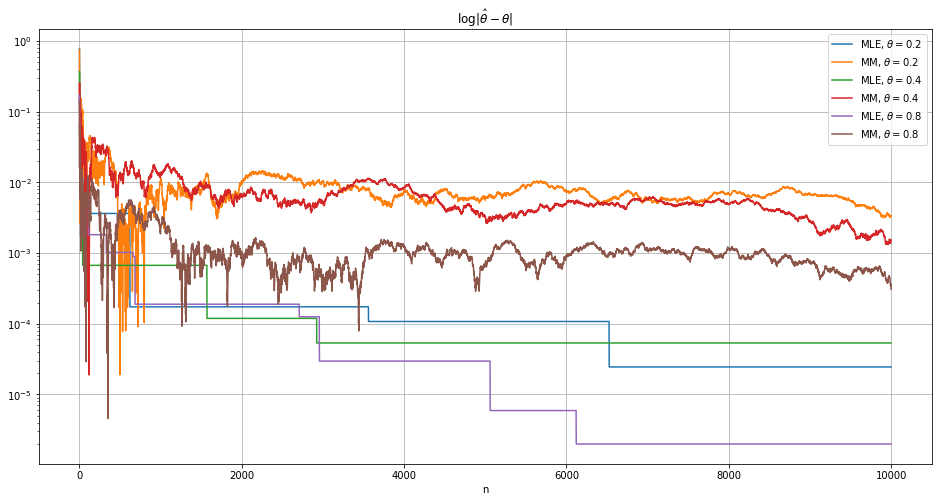

In [ ]:
plt.figure(figsize=(16, 8))
plt.grid()
plt.title(r'$\log|\hat{\theta} - \theta|$')
plt.yscale('log')
plt.xlabel('n')

for i in range(len(thetas)):
    x = np.arange(N) + 1
    plt.plot(x, 
             np.abs(MLE[i] - thetas[i]), 
             label=(r'MLE, $\theta = $' + str(thetas[i])))
    plt.plot(x, 
             np.abs(MM[i] - thetas[i]), 
             label=(r'MM, $\theta = $' + str(thetas[i])))
    
plt.legend()

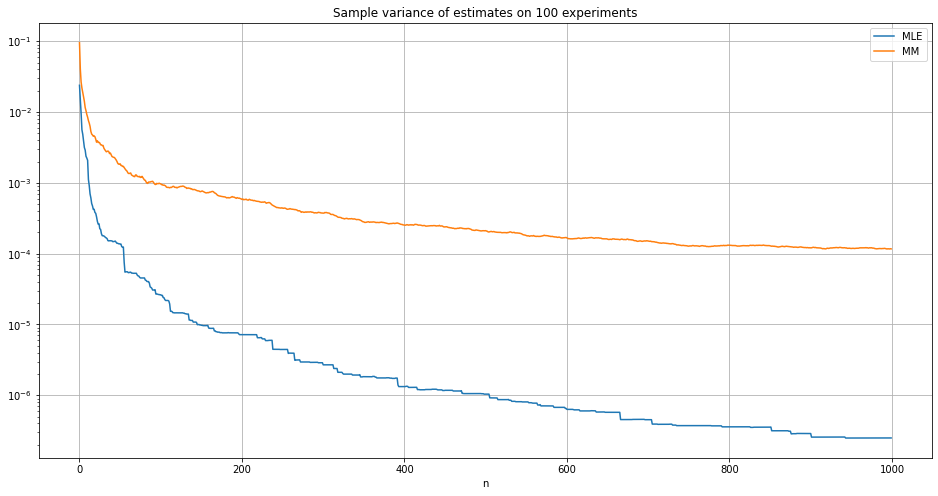

In [ ]:
theta = 0.5
sample = sts.uniform(loc=theta, scale=(1-theta)).rvs((M, N_dis))

est_mle = np.minimum.accumulate(sample, axis=1)
mean_mle = np.mean(est_mle, axis=0)
s_mle = np.mean((est_mle - mean_mle)**2, axis=0) * M / (M - 1)

est_mm = np.cumsum(2 * sample - 1, axis=1) / (np.arange(N_dis) + 1)
mean_mm = np.mean(est_mm, axis=0)
s_mm = np.mean((est_mm - mean_mm)**2, axis=0) * M / (M - 1)

plt.figure(figsize=(16, 8))
plt.title(f'Sample variance of estimates on {M} experiments')
plt.plot(s_mle, label='MLE')
plt.plot(s_mm, label='MM')
plt.yscale('log')
plt.xlabel('n')
plt.grid()
plt.legend()